In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("Advertising.csv")
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


#### Remove  Unnamed: 0  INDEX/column from the columns(axis =1 and inplace = true)

In [7]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


#### EDA

In [8]:
import seaborn as sns

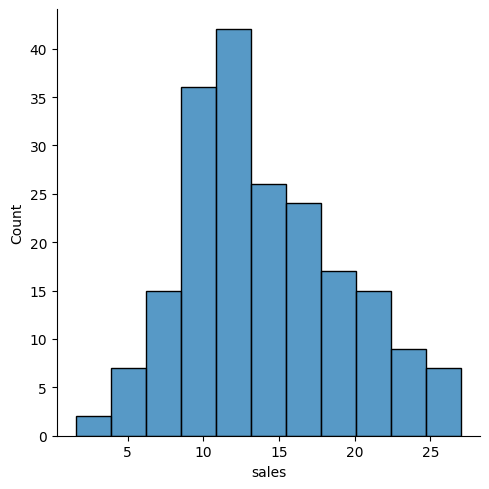

In [9]:
sns.displot(df.sales)

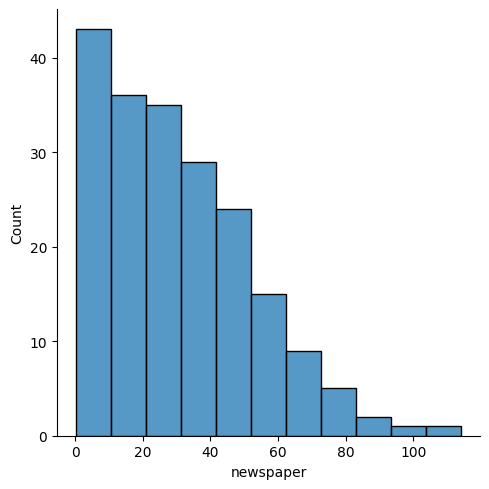

In [10]:
sns.displot(df.newspaper)

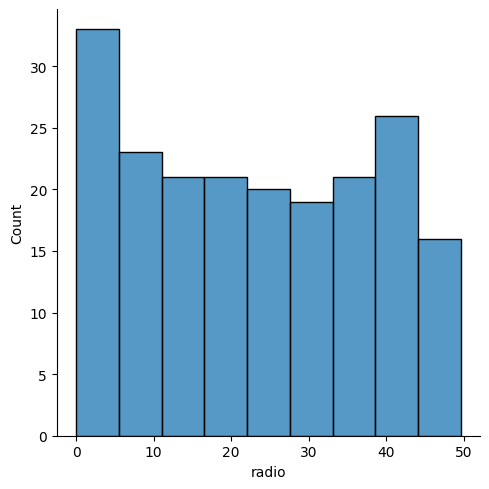

In [11]:
sns.displot(df.radio)

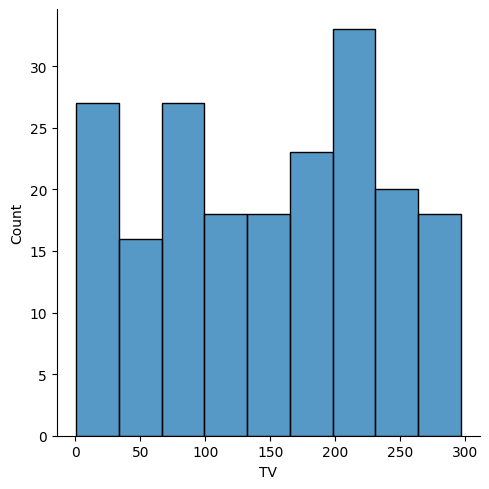

In [12]:
sns.displot(df.TV)

#### Explore relatioships between predictors and response variable

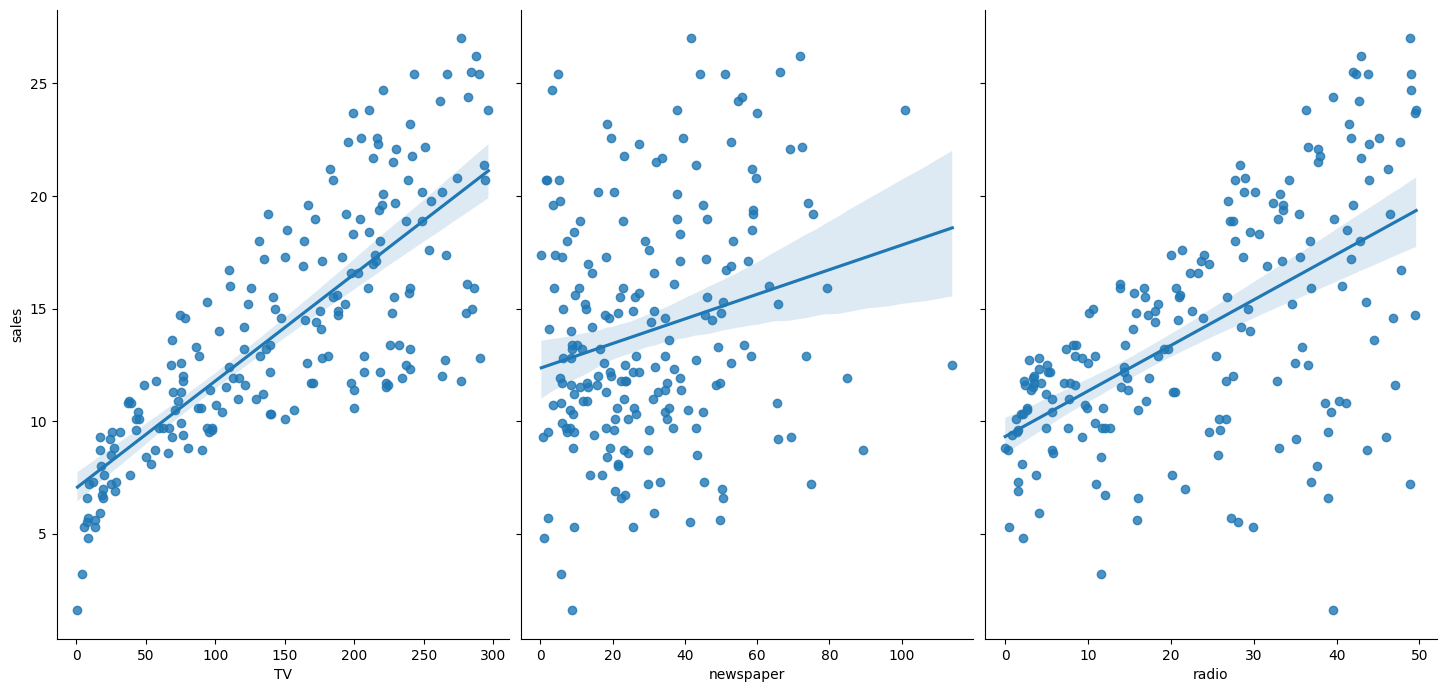

In [13]:
sns.pairplot(df, x_vars = ['TV', 'newspaper', 'radio'], y_vars ='sales', height = 7, aspect = 0.7, kind = 'reg')

#### Pearso correlation to see how correlated x_vars are with y_var

In [14]:
df.TV.corr(df.sales)

0.7822244248616061

In [16]:
df.radio.corr(df.sales)

0.5762225745710551

In [17]:
df.newspaper.corr(df.sales)

0.22829902637616528

### check all in one-Go

In [18]:
df.corr()

#as the multiple plots including sns showed; TV has the highest correlation with sales(78%)

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

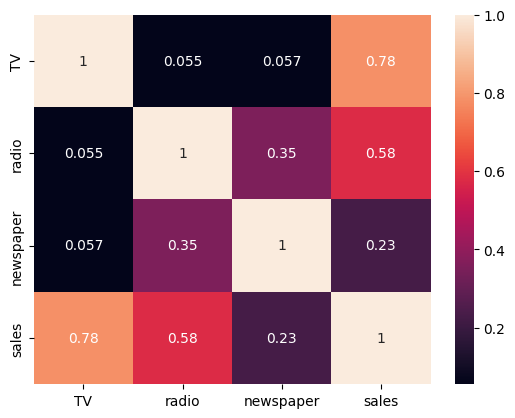

In [20]:
### More informative way to plot corr

sns.heatmap(df.corr(),annot = True)

#### Create the desired X and Y for your model; X to be pandas df, and Y pandas series.

In [26]:
X = df[['TV']]
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 1)


In [28]:
y = df.sales
type(Y)

pandas.core.series.Series

#### Train and test split methods for the regression model

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 1)
(50, 1)
(150,)
(50,)


In [34]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

### Model Evaluation
Interpretations of the Coeffs

In [37]:
print("Bo is: ", linreg.intercept_)
print("B1 is: ", linreg.coef_)

Bo is:  6.9119726188687185
B1 is:  [0.04802945]


### Making predictions

In [41]:
y_pred = linreg.predict(X_test)
y_pred[:5]   # We can not us the head method since this is a numpy array; so slicing is the way 

## But how do we know if the below numbers evaluated below are correct

array([17.03658069, 16.63793625, 11.50839099, 20.36982452, 19.10184704])

In [ ]:
### let's quantify the error in our model; or how different the actuals are from the above predicted

### MAE, MSE, RMSE are useful for doing the above mentioned quantifications in Linear reg

MAE

In [46]:
true = [100, 50,30, 20]
pred = [90, 50, 50,30]

print((10 + 0 + 20 + 10)/4)

from sklearn import metrics

print(metrics.mean_absolute_error(true,pred))

10.0
10.0


### MSE

In [48]:
true = [100, 50,30, 20]
pred = [90, 50, 50,30]

print((10**2 + 0**2 + 20**2 + 10**2)/4)

from sklearn import metrics

print(metrics.mean_squared_error(true, pred))

150.0
150.0


### RMSE

In [50]:
true = [100, 50,30, 20]
pred = [90, 50, 50,30]

print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4))

from sklearn import metrics

print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.24744871391589
12.24744871391589


### RMSE for our sales prediction

In [53]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

3.210929707703542
